# PETR6397 Final Project: Oil Production Forecasting using Machine Learning

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

# Load the two data files from data folder into one dataframe df

# read the first CSV file into a DataFrame
df1 = pd.read_csv('Data/MonthlyProduction1.CSV')

# read the second CSV file into another DataFrame
df2 = pd.read_csv('Data/MonthlyProduction2.CSV')

# concatenate the two DataFrames vertically
df = pd.concat([df1, df2], axis=0)

# print the resulting DataFrame
df.head(10)

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number
0,130854587,4.213538e+13,4213538451,2019-12-01,1.0,139.0,7,1,NaN,0.03,4.48,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1
1,130854587,4.213538e+13,4213538451,2020-01-01,22.0,270.0,1205,1,NaN,0.71,8.71,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2
2,130854587,4.213538e+13,4213538451,2020-02-01,15.0,130.0,846,1,NaN,0.52,4.48,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3
3,130854587,4.213538e+13,4213538451,2020-03-01,14.0,308.0,788,1,NaN,0.45,9.94,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4
4,130854587,4.213538e+13,4213538451,2020-04-01,13.0,268.0,773,1,NaN,0.43,8.93,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5
5,130854587,4.213538e+13,4213538451,2020-05-01,9.0,31.0,546,1,NaN,0.29,1.00,17.61,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,6
6,130854587,4.213538e+13,4213538451,2020-06-01,6.0,0.0,395,1,NaN,0.20,0.00,13.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,7
7,130854587,4.213538e+13,4213538451,2020-07-01,6.0,244.0,435,1,NaN,0.19,7.87,14.03,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,8
8,130854587,4.213538e+13,4213538451,2020-08-01,12.0,262.0,832,1,NaN,0.39,8.45,26.84,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,9
9,130854587,4.213538e+13,4213538451,2020-09-01,10.0,188.0,698,1,NaN,0.33,6.27,23.27,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,10


In [2]:
# We can create a new column Gas to Oil Ratio (i.e GOR) 

df['GOR'] = df['Monthly Gas'] / df['Monthly Oil']
df.head(10)

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,...,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number,GOR
0,130854587,4.213538e+13,4213538451,2019-12-01,1.0,139.0,7,1,NaN,0.03,...,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1,139.000000
1,130854587,4.213538e+13,4213538451,2020-01-01,22.0,270.0,1205,1,NaN,0.71,...,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2,12.272727
2,130854587,4.213538e+13,4213538451,2020-02-01,15.0,130.0,846,1,NaN,0.52,...,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3,8.666667
3,130854587,4.213538e+13,4213538451,2020-03-01,14.0,308.0,788,1,NaN,0.45,...,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4,22.000000
4,130854587,4.213538e+13,4213538451,2020-04-01,13.0,268.0,773,1,NaN,0.43,...,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5,20.615385
5,130854587,4.213538e+13,4213538451,2020-05-01,9.0,31.0,546,1,NaN,0.29,...,17.61,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,6,3.444444
6,130854587,4.213538e+13,4213538451,2020-06-01,6.0,0.0,395,1,NaN,0.20,...,13.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,7,0.000000
7,130854587,4.213538e+13,4213538451,2020-07-01,6.0,244.0,435,1,NaN,0.19,...,14.03,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,8,40.666667
8,130854587,4.213538e+13,4213538451,2020-08-01,12.0,262.0,832,1,NaN,0.39,...,26.84,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,9,21.833333
9,130854587,4.213538e+13,4213538451,2020-09-01,10.0,188.0,698,1,NaN,0.33,...,23.27,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,10,18.800000


## Part 1.  Exploratory Data Analysis

In [3]:
# check the shape of the DataFrame

print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (773296, 21)


In [4]:
# print total well count in the dataset

well_count = df['Entity ID'].nunique()
print("Total Number of wells:", well_count)

Total Number of wells: 1049


In [5]:
# check the data types of the columns

print("\n Data types of columns:\n")
df.dtypes


 Data types of columns:



Entity ID                    int64
API/UWI                    float64
API/UWI List                object
Monthly Production Date     object
Monthly Oil                float64
Monthly Gas                float64
Monthly Water                int64
Well Count                   int64
Days                       float64
Daily Avg Oil              float64
Daily Avg Gas              float64
Daily Avg Water            float64
Reservoir                   object
Well/Lease Name             object
Well Number                 object
Operator Company Name       object
Production Type             object
Production Status           object
Entity Type                 object
Producing Month Number       int64
GOR                        float64
dtype: object

In [6]:
# convert the 'Monthly Production Date' column to datetime dtype

df['Monthly Production Date'] = pd.to_datetime(df['Monthly Production Date'])
df.dtypes

Entity ID                           int64
API/UWI                           float64
API/UWI List                       object
Monthly Production Date    datetime64[ns]
Monthly Oil                       float64
Monthly Gas                       float64
Monthly Water                       int64
Well Count                          int64
Days                              float64
Daily Avg Oil                     float64
Daily Avg Gas                     float64
Daily Avg Water                   float64
Reservoir                          object
Well/Lease Name                    object
Well Number                        object
Operator Company Name              object
Production Type                    object
Production Status                  object
Entity Type                        object
Producing Month Number              int64
GOR                               float64
dtype: object

In [7]:
# check for missing values

print("\n Number of missing values:")
df.isna().sum()


 Number of missing values:


Entity ID                       0
API/UWI                         0
API/UWI List                    0
Monthly Production Date         0
Monthly Oil                   380
Monthly Gas                   356
Monthly Water                   0
Well Count                      0
Days                       746292
Daily Avg Oil                 380
Daily Avg Gas                 356
Daily Avg Water                 0
Reservoir                    2684
Well/Lease Name                 0
Well Number                  6866
Operator Company Name           0
Production Type                 0
Production Status               0
Entity Type                     0
Producing Month Number          0
GOR                           890
dtype: int64

As we have only 27,004 values in 'Days' column out of total 7,73,296 rows. The imputation method will not be a good choice to handle this missing value issues as it will add bias in the dataset. Thus, we can drop the 'Days' column to get better efficiency.

In [8]:
# drop the 'Days' and 'Well Number' columns

df = df.drop(columns=['Days', 'Well Number'])
df.isna().sum()

Entity ID                     0
API/UWI                       0
API/UWI List                  0
Monthly Production Date       0
Monthly Oil                 380
Monthly Gas                 356
Monthly Water                 0
Well Count                    0
Daily Avg Oil               380
Daily Avg Gas               356
Daily Avg Water               0
Reservoir                  2684
Well/Lease Name               0
Operator Company Name         0
Production Type               0
Production Status             0
Entity Type                   0
Producing Month Number        0
GOR                         890
dtype: int64

In [9]:
# summary statistics for numerical columns

df.describe()

,Entity ID,API/UWI,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Producing Month Number,GOR
count,7.732960e+05,7.732960e+05,772916.000000,772940.000000,7.732960e+05,773296.000000,772916.000000,772940.000000,773296.000000,773296.000000,7.724060e+05
mean,1.262313e+08,4.213525e+13,536.239141,546.452097,7.396827e+03,1.020856,17.616824,17.949356,243.004030,257.563919,inf
std,1.323235e+07,1.675612e+08,1102.827386,2890.248581,1.860082e+04,0.271829,36.216032,94.893978,611.029891,194.551139,NaN
min,3.043260e+05,4.213500e+13,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1.273338e+08,4.213508e+13,91.000000,15.000000,6.180000e+02,1.000000,2.970000,0.480000,20.300000,95.000000,6.565657e-02
50%,1.275302e+08,4.213530e+13,229.000000,68.000000,2.978000e+03,1.000000,7.540000,2.230000,97.810000,214.000000,2.786885e-01
75%,1.277265e+08,4.213538e+13,560.000000,283.000000,7.416000e+03,1.000000,18.390000,9.320000,243.275000,389.000000,1.068637e+00
max,1.310139e+08,4.213590e+13,35382.000000,190132.000000,1.411641e+06,9.000000,1141.350000,6133.290000,45536.810000,997.000000,inf


As we can see their is large variation between mean and median values for Monthly oil production i.e Mean = 536.23 & Median = 229. Replace the missing value with the median of the non-missing values in the missing column will be optimal imputation method. As, this method is more robust to outliers than mean imputation and is appropriate for the data i.e. skewed or contain outliers. Thus, will impute median values for 'Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas' and 'GOR'. 

While computing 'GOR' column, we have some divion errors (i.e inf) which also be imputed using median imputaion method.

Finally, we will use mode to impute the missing value for our categorical feature 'Reservoir' column

In [10]:
# Imputation for missing values 

# A) impute missing values with median for numerical columns i.e. 'Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas'
num_cols = ['Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas','GOR']
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# replace division error values in the GOR column with the median of the column
median_GOR = df['GOR'].replace([np.inf, -np.inf], np.nan).median()
df['GOR'] = df['GOR'].replace([np.inf, -np.inf], median_GOR)

# B) Now lets impute object feature 'Reservoir' with mode
df['Reservoir'].fillna(df['Reservoir'].mode()[0], inplace=True)

df.isna().sum()

Entity ID                  0
API/UWI                    0
API/UWI List               0
Monthly Production Date    0
Monthly Oil                0
Monthly Gas                0
Monthly Water              0
Well Count                 0
Daily Avg Oil              0
Daily Avg Gas              0
Daily Avg Water            0
Reservoir                  0
Well/Lease Name            0
Operator Company Name      0
Production Type            0
Production Status          0
Entity Type                0
Producing Month Number     0
GOR                        0
dtype: int64

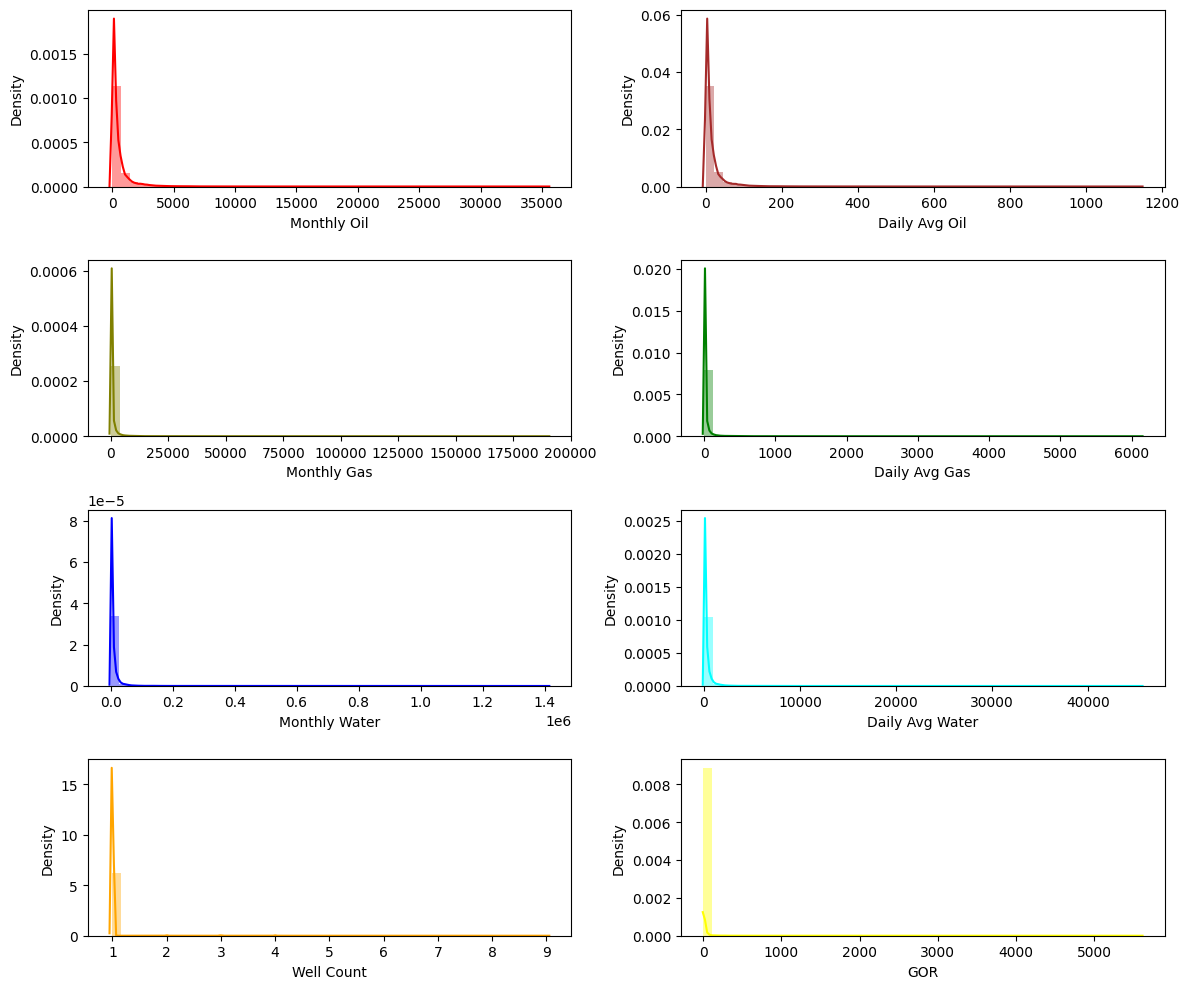

In [11]:
#let’s visualize the distribution of each parameter

f, axes = plt.subplots(4, 2, figsize=(12, 10))
sns.distplot(df['Monthly Oil'] , color="red", ax=axes[0, 0])
sns.distplot(df['Daily Avg Oil'] , color="brown", ax=axes[0, 1])
sns.distplot(df['Monthly Gas'] , color="olive", ax=axes[1, 0])
sns.distplot(df['Daily Avg Gas'] , color="green", ax=axes[1, 1])
sns.distplot(df['Monthly Water'] , color="blue", ax=axes[2, 0])
sns.distplot(df['Daily Avg Water'] , color="cyan", ax=axes[2, 1])
sns.distplot(df['Well Count'] , color="orange", ax=axes[3, 0])
sns.distplot(df['GOR'] , color="yellow", ax=axes[3, 1])

plt.tight_layout()

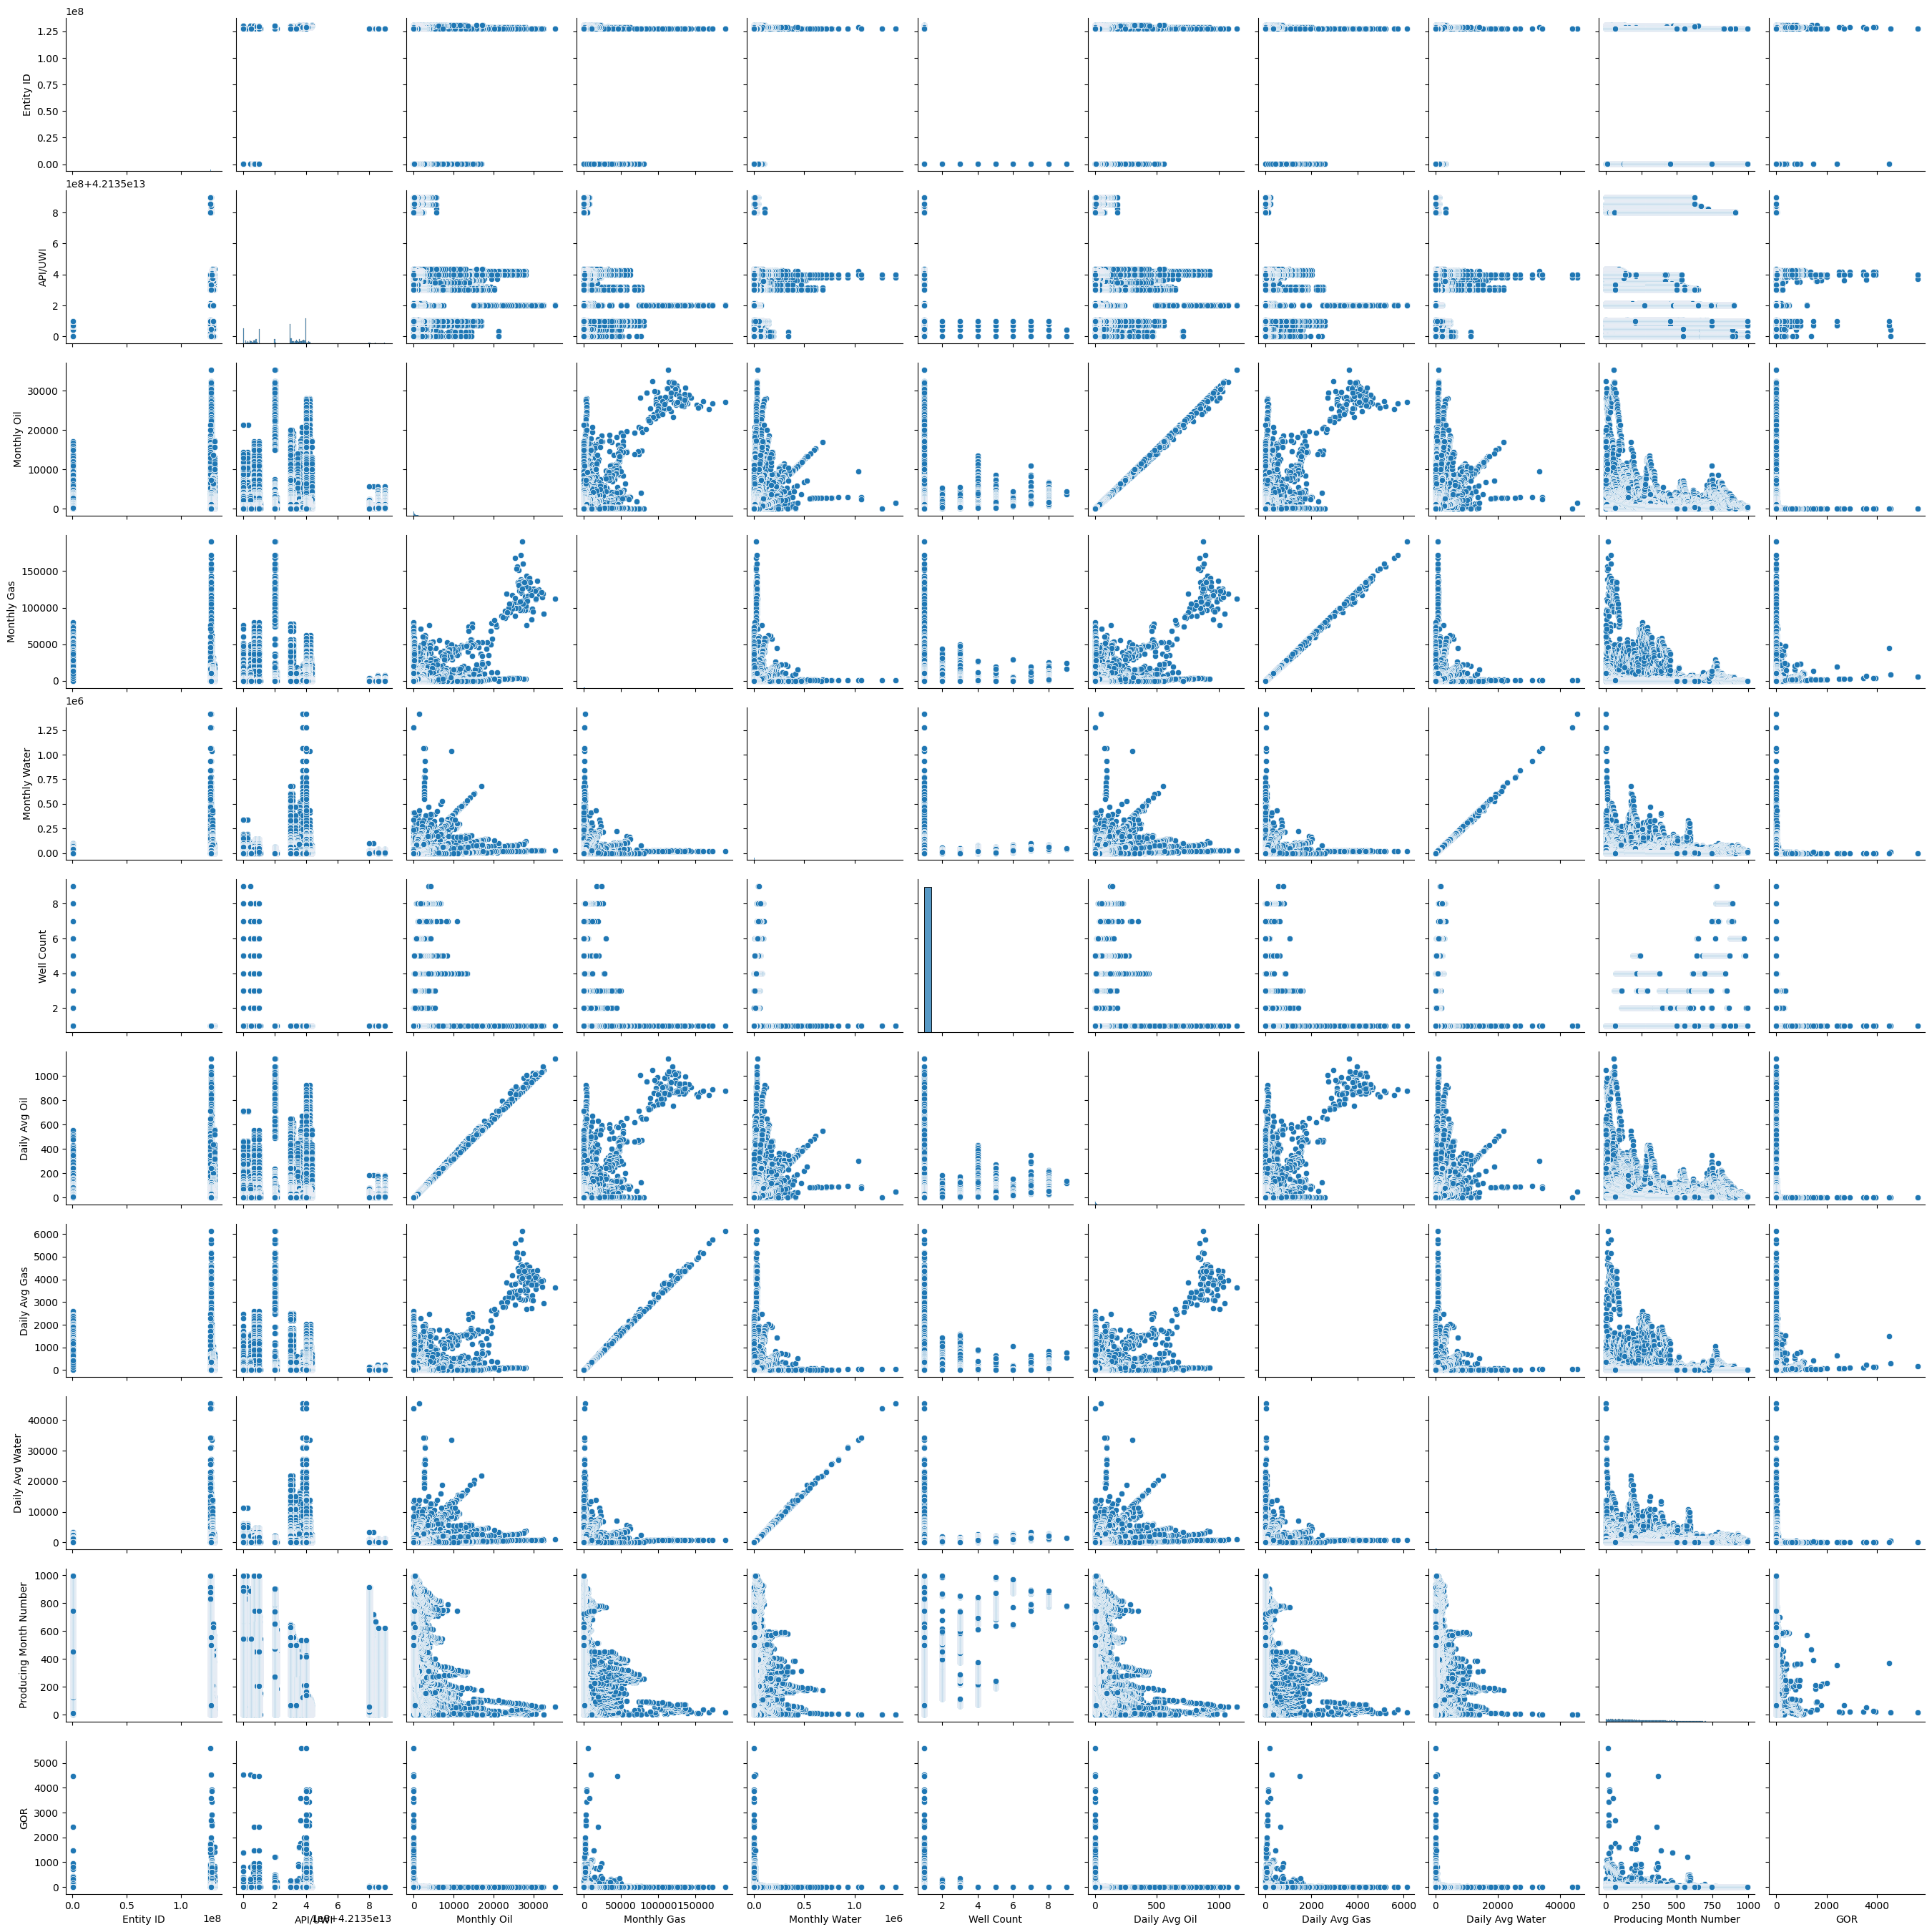

In [35]:
# Create a Pairplot for any correlations

sns.pairplot(df)

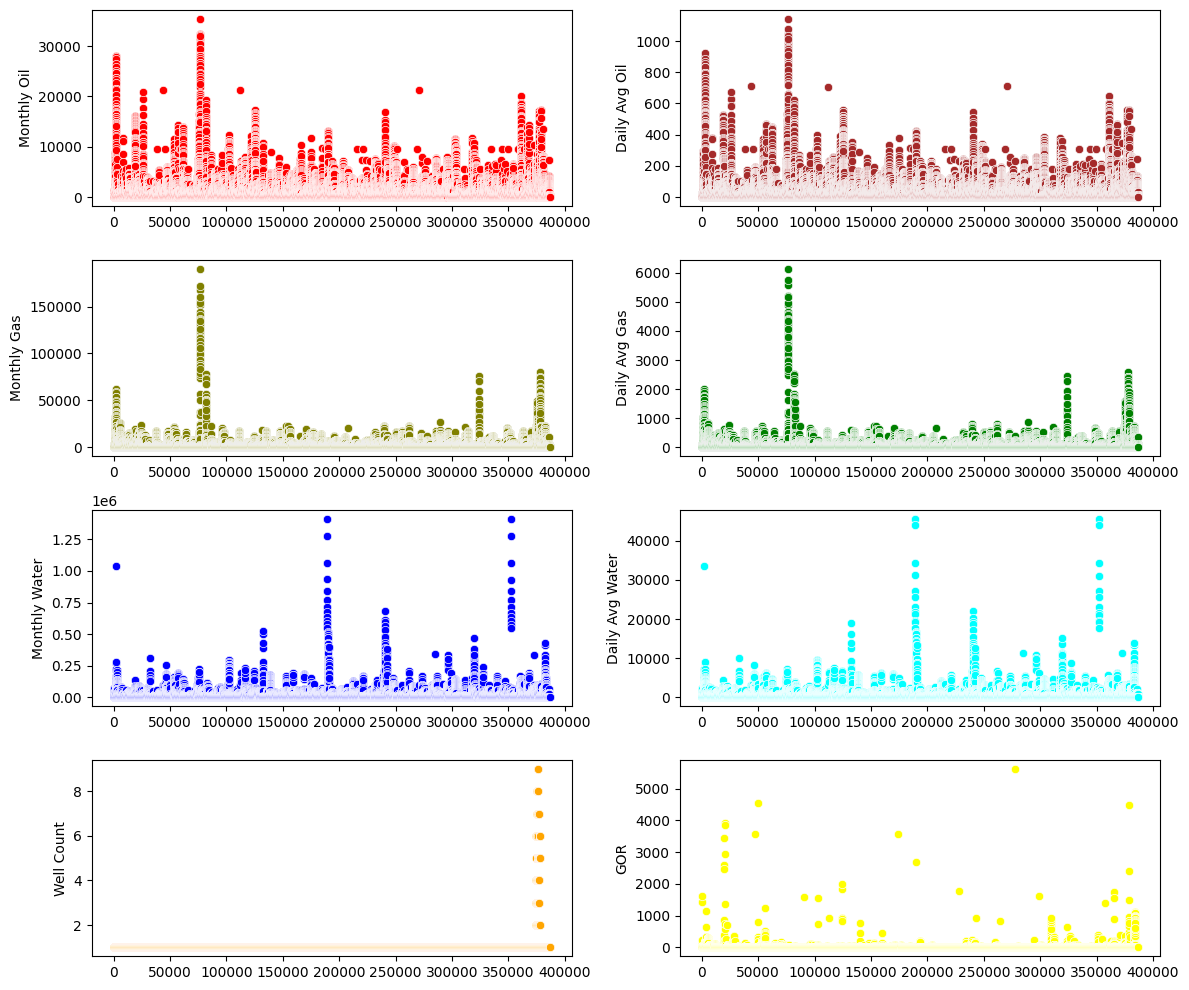

In [13]:
#let’s visualize the relations for each parameter

f, axes = plt.subplots(4, 2, figsize=(12, 10))
sns.scatterplot(df['Monthly Oil'] , color="red", ax=axes[0, 0])
sns.scatterplot(df['Daily Avg Oil'] , color="brown", ax=axes[0, 1])
sns.scatterplot(df['Monthly Gas'] , color="olive", ax=axes[1, 0])
sns.scatterplot(df['Daily Avg Gas'] , color="green", ax=axes[1, 1])
sns.scatterplot(df['Monthly Water'] , color="blue", ax=axes[2, 0])
sns.scatterplot(df['Daily Avg Water'] , color="cyan", ax=axes[2, 1])
sns.scatterplot(df['Well Count'] , color="orange", ax=axes[3, 0])
sns.scatterplot(df['GOR'] , color="yellow", ax=axes[3, 1])

plt.tight_layout()

<Axes: >

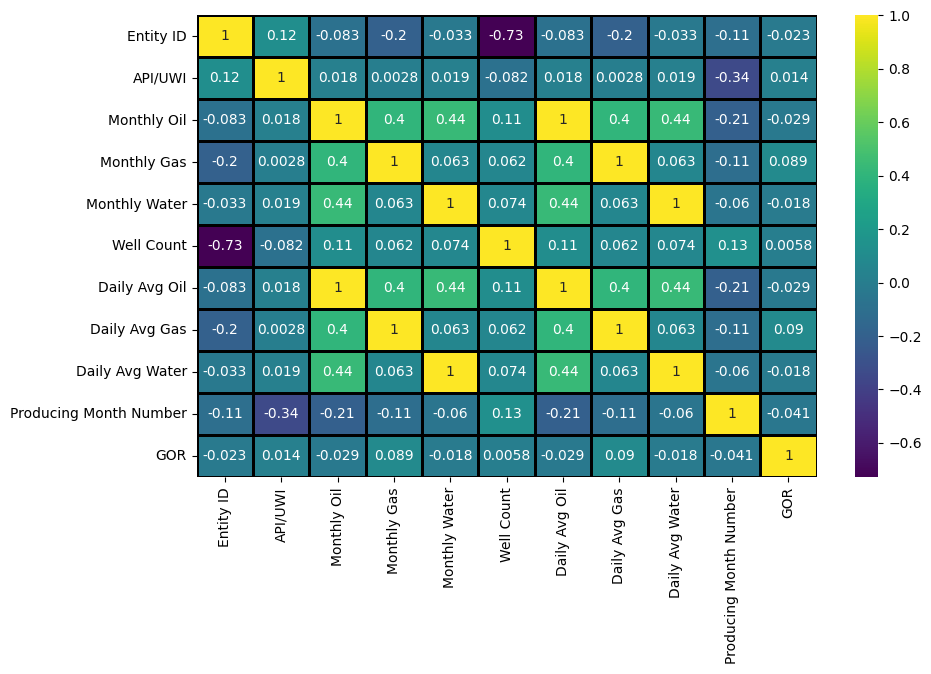

In [14]:
# Lets find any collinearity between input features using seaborn library

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

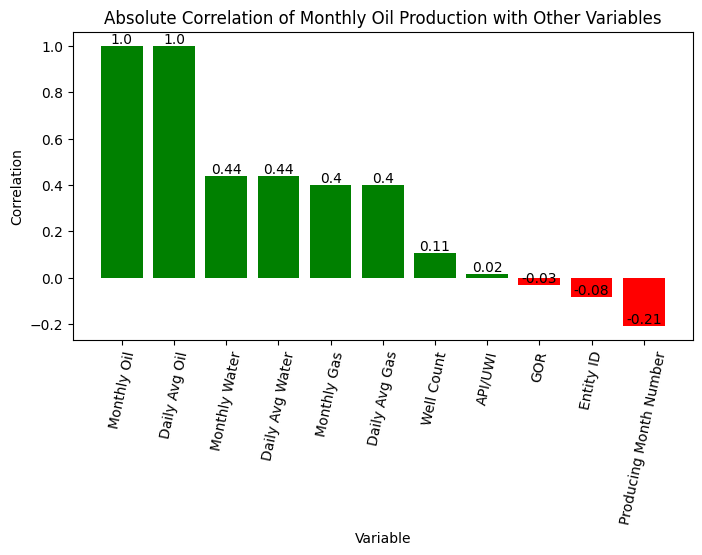

In [15]:
# calculate the correlation coefficients with the target variable
corr_matrix = df.corr(method='pearson')['Monthly Oil'].sort_values(ascending=False)

# Create a bar plot of the correlation matrix
fig, ax = plt.subplots(figsize=(8,4))
colors = np.where(corr_matrix.values > 0, 'g', 'r')
ax.bar(corr_matrix.index, corr_matrix.values, color=colors)

# Set the title and axis labels
ax.set_title('Absolute Correlation of Monthly Oil Production with Other Variables')
ax.set_xlabel('Variable')
ax.set_ylabel('Correlation')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=78)

# Annotate the correlation values on the bars
for i, v in enumerate(corr_matrix.values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Show the plot
plt.show()

We can see that 'Monthly Oil' production is highly correlated to 'Daily Avg Oil'; Similarly we can see that 'Monthly Water' & 'Monthly Gas' are correlated with 'Daily Water' & 'Daily Gas'. Thus we can ignore these highly correlated features (i.e Daily Avg Oil, Daily Water & Daily Gas) while model implementation.

## Part 2.  Implementing Machine Learning Models

### a. Data Transformation & Splitting it into Training, Validation & Test Dataset

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset and create the features and target variable
X = df[['Entity ID','Monthly Gas','Monthly Water','Well Count','Producing Month Number','GOR']]
y = df['Monthly Oil']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### b.  Multiple Model Implementation

In [17]:
# Implement & fit the models using GridsearchCV

# Create K-fold cross validation for GridSearch calculations
cv = KFold(n_splits=5)

# 1. Linear Regression
lr_param_grid = {'fit_intercept': [True, False]}
lr = GridSearchCV(LinearRegression(),lr_param_grid,cv=cv).fit(X_train, y_train)

In [18]:
# 2. Ridge Regression
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}

ridge = GridSearchCV(Ridge(random_state=42), ridge_param_grid, cv=cv).fit(X_train, y_train)

In [19]:
# 3. Lasso Regression
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}

lasso = GridSearchCV(Lasso(random_state=42), lasso_param_grid, cv=cv).fit(X_train, y_train)

In [20]:
# 4. KNN
knn_param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=cv).fit(X_train, y_train)

In [21]:
# 5. Decision Tree
tree_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}
dtree = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=5).fit(X_train, y_train)

In [22]:
# 6. RandomForest
rforest_param_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': ['sqrt', 'log2']}

rforest = GridSearchCV(RandomForestRegressor(random_state=42),rforest_param_grid, cv=cv).fit(X_train, y_train)

In [25]:
# 7. XGBoost
xgb_param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 20, 30]}
xgboost = GridSearchCV(xgb.XGBRegressor(random_state=42),xgb_param_grid, cv=cv).fit(X_train, y_train)

### c. Validating all the Model Evaluation on the Validation dataset

In [26]:
 # Evaluate the Best model from the validation set

models = [lr, ridge, lasso, knn, dtree, rforest, xgboost]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree','Random Forest', 'XGBoost']
best_models = []

print('Model Evaluation on Validation data')
for i, model in enumerate(models):
    y_val_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    print(f"\n{model_names[i]}:")
    print(f"R2 score: {r2}")
    print(f"RMSE: {np.sqrt(mse)}")

Model Evaluation on Validation data

Linear Regression:
R2 score: 0.3798513832250714
RMSE: 877.3791410850282

Ridge:
R2 score: 0.37985125256073415
RMSE: 877.3792335162252

Lasso:
R2 score: 0.3798512969688168
RMSE: 877.3792021022052

KNN:
R2 score: 0.9537645173303478
RMSE: 239.56706564762843

Decision Tree:
R2 score: 0.9792139155173966
RMSE: 160.62966720884694

Random Forest:
R2 score: 0.993348688234227
RMSE: 90.86425455401275

XGBoost:
R2 score: 0.9901251526304866
RMSE: 110.71452761549787


### d. Final Model Performances comparison on the Testing dataset

In [27]:
 # Evaluate the Best model from the validation set

models = [lr, ridge, lasso, knn, dtree, rforest, xgboost]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree','Random Forest', 'XGBoost']
best_models = []

print('Model Evaluation on Validation data')
for i, model in enumerate(models):
    y_val_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    print(f"\n{model_names[i]}:")
    print(f"R2 score: {r2}")
    print(f"RMSE: {np.sqrt(mse)}")

Model Evaluation on Validation data

Linear Regression:
R2 score: 0.3798513832250714
RMSE: 877.3791410850282

Ridge:
R2 score: 0.37985125256073415
RMSE: 877.3792335162252

Lasso:
R2 score: 0.3798512969688168
RMSE: 877.3792021022052

KNN:
R2 score: 0.9537645173303478
RMSE: 239.56706564762843

Decision Tree:
R2 score: 0.9792139155173966
RMSE: 160.62966720884694

Random Forest:
R2 score: 0.993348688234227
RMSE: 90.86425455401275

XGBoost:
R2 score: 0.9901251526304866
RMSE: 110.71452761549787


### e. Visualizing all Model Predictions

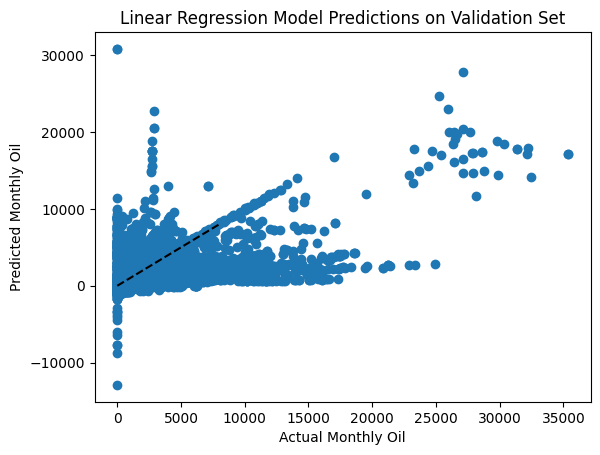

In [28]:
# Linear Regression Model Predictions on Testing data set
y_pred_lr= lr.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_lr)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil")
plt.ylabel("Predicted Monthly Oil")
plt.title("Linear Regression Model Predictions on Validation Set")
plt.show()

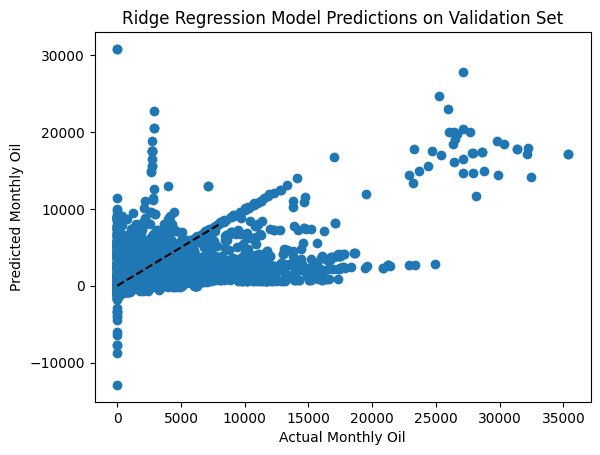

In [29]:
# Ridge Regression Model Predictions on Testing data set
y_pred_ridge = ridge.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_ridge)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil")
plt.ylabel("Predicted Monthly Oil")
plt.title("Ridge Regression Model Predictions on Validation Set")
plt.show()

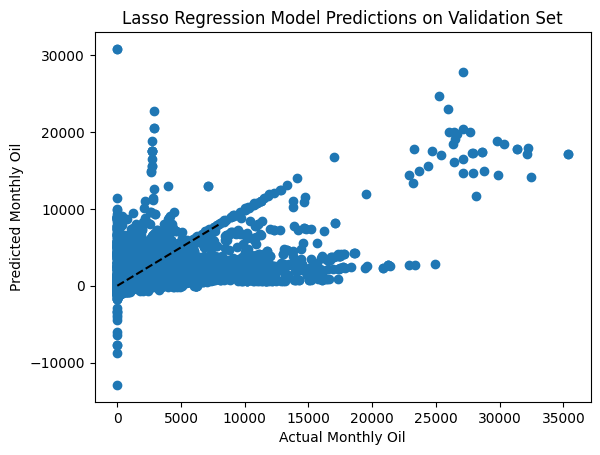

In [30]:
# Lasso Regression Model Predictions on Testing data set
y_pred_lasso = lasso.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_lasso)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil")
plt.ylabel("Predicted Monthly Oil")
plt.title("Lasso Regression Model Predictions on Validation Set")
plt.show()

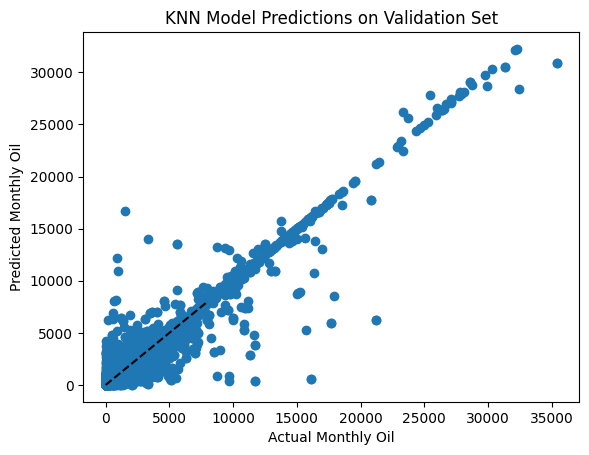

In [31]:
# KNN Model Predictions on VTesting data set
y_pred_knn = knn.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_knn)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil")
plt.ylabel("Predicted Monthly Oil")
plt.title("KNN Model Predictions on Validation Set")
plt.show()

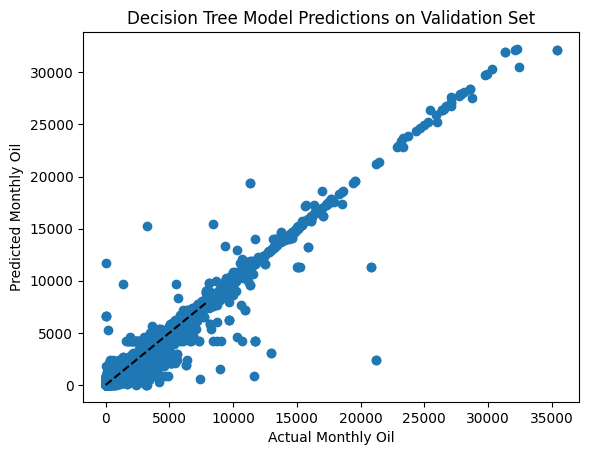

In [32]:
# Decision Tree Model Predictions on Testing data set
y_pred_dtree = dtree.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_dtree)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil")
plt.ylabel("Predicted Monthly Oil")
plt.title("Decision Tree Model Predictions on Validation Set")
plt.show()

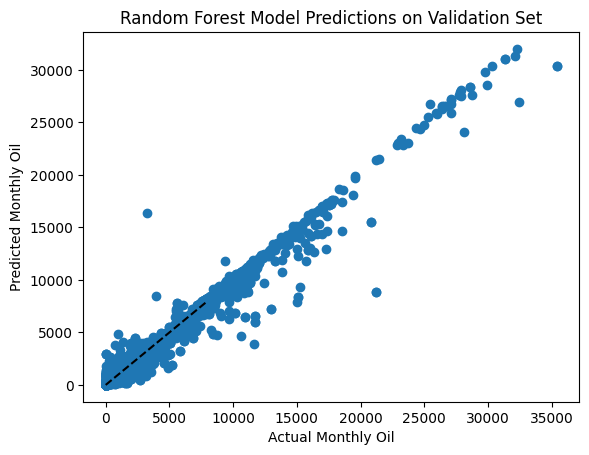

In [33]:
# Random Forest Model Predictions on Testing data set
y_pred_rforest = rforest.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_rforest)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil")
plt.ylabel("Predicted Monthly Oil")
plt.title("Random Forest Model Predictions on Validation Set")
plt.show()

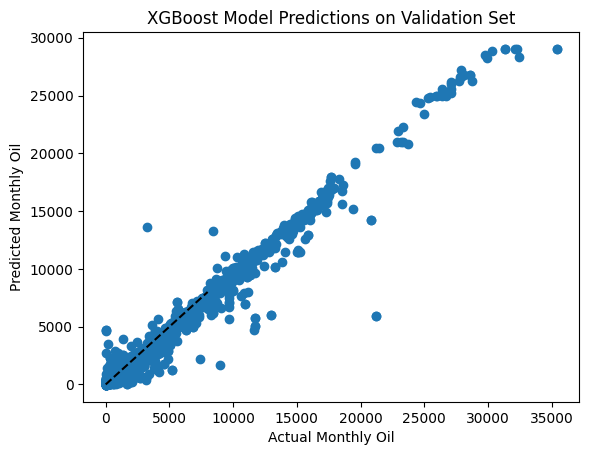

In [36]:
# XGBoost Model Predictions on Testing data set
y_pred_xgb = xgboost.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_xgb)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil")
plt.ylabel("Predicted Monthly Oil")
plt.title("XGBoost Model Predictions on Validation Set")
plt.show()

## Part 3. Forecasting Estimated Ultimate Recovery (EUR) using ARIMA model

In [37]:
# ARIMA Model for Estimated Ultimate Recovery (EUR)

## Conclusion: